<a id="ch4"></a>
# Step 3: Prepare Data for Consumption
Since step 2 was provided to us on a golden plater, so is step 3. Therefore, normal processes in data wrangling, such as data architecture, governance, and extraction are out of scope. Thus, only data cleaning is in scope.

## 3.1 Import Libraries
The following code is written in Python 3.x. Libraries provide pre-written functionality to perform necessary tasks. The idea is why write ten lines of code, when you can write one line. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Python version: 3.6.5 (default, Apr  1 2018, 05:46:30) 
[GCC 7.3.0]
pandas version: 0.23.4
matplotlib version: 2.2.2
NumPy version: 1.14.3
SciPy version: 1.1.0
IPython version: 5.0.0
scikit-learn version: 0.19.1
-------------------------


## 3.11 Load Data Modelling Libraries

We will use the popular *scikit-learn* library to develop our machine learning algorithms. In *sklearn,* algorithms are called Estimators and implemented in their own classes. For data visualization, we will use the *matplotlib* and *seaborn* library. Below are common classes to load.

In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

## 3.2 Meet and Greet Data



In [3]:
#import data from file: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
data_raw = pd.read_csv('TRUMPF_TruLaserCenter_Dataset_2018.csv')
#data_raw = pd.read_csv('harmonized_dataset.csv')


#a dataset should be broken into 3 splits: train, test, and (final) validation
#the test file provided is the validation file for competition submission
#we will split the train set into train and test data in future sections
#data_val  = pd.read_csv('../input/test.csv')

# split in pseudo train/test
data_val = data_raw[1:2]
data_raw = data_raw[2:]


#to play with our data we'll create a copy
#remember python assignment or equal passes by reference vs values, so we use the copy function: https://stackoverflow.com/questions/46327494/python-pandas-dataframe-copydeep-false-vs-copydeep-true-vs
data1 = data_raw.copy(deep = True)


#however passing by reference is convenient, because we can clean both datasets at once
data_cleaner = [data1, data_val]


#preview data
print (data_raw.info()) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
#data_raw.head() #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html
#data_raw.tail() #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.tail.html
data_raw.sample(10) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121083 entries, 2 to 121084
Data columns (total 100 columns):
DataID                           121083 non-null object
id_00002_name_lst                121083 non-null object
id_00003_name_teil               121083 non-null object
id_00004_maschinennummer         121083 non-null object
id_00005_entnum                  121083 non-null int64
id_00006_framework_version       121083 non-null object
id_01001_density                 121083 non-null float64
id_01002_thickness               121083 non-null float64
id_01003_emodul                  121083 non-null int64
id_01004_cut_tech                120258 non-null object
id_01005_b_spalt                 121083 non-null float64
id_01006_zerschneidung_tafel     121083 non-null float64
id_01007_k_flex_s1               121083 non-null float64
id_01008_k_flex_s2               121083 non-null float64
id_01009_k_flex_s3               121083 non-null float64
id_02001_area                    121083 non

DataID      id_00002_name_lst     id_00003_name_teil  \
86271   A0280E001018080701068        11A1015CP_1.LST  11A1015CP-01-50500110   
42563   A0280E000618031501675           830891_1.LST                  P2020   
53557   A0280E000618050300284           841998_1.LST                  P2029   
101845  A0280E002118042000011             N150_1.LST                   P723   
31104   A0280E000618032201742           821195_1.LST             OA116298_1   
83775   A0280E000918011000898  N338_PLAETTCHEN_1.LST              222205_01   
88335   A0280E001018080701537        11A1015CP_1.LST  11A1015CP-01-50500110   
71977   A0280E000618012700105           N304V2_1.LST                  P2631   
118740  A0280E002118032001499              N83_1.LST                 222205   
44222   A0280E000618032202041           831291_1.LST                  P3116   

       id_00004_maschinennummer  id_00005_entnum id_00006_framework_version  \
86271                A0280E0010               19                       V3-3   
42563                A0280E0006              236                       V3-3   
53557                A0280E0006               48                       V3-3   
101845               A0280E0021                4                       V3-3   
31104                A0280E0006              119                       V3-3   
83775                A0280E0009              500                       V3-3   
88335                A0280E0010               27                       V3-3   
71977                A0280E0006                3                       V3-3   
118740               A0280E0021              240                       V3-3   
44222                A0280E0006               32                       V3-3   

        id_01001_density  id_01002_thickness  id_01003_emodul  \
86271           0.000003                 1.2            70000   
42563           0.000008                 3.0           200000   
53557           0.000008                 1.0           200000   
101845          0.000008                 2.5           200000   
31104           0.000008                 3.0           200000   
83775           0.000008                 3.0           200000   
88335           0.000003                 1.2            70000   
71977           0.000008                 3.0           200000   
118740          0.000008                 3.0           200000   
44222           0.000008                 1.5           200000   

       id_01004_cut_tech              ...                id_03058_l_BBT_PH_y  \
86271                 N2              ...                          38.021000   
42563                 N2              ...                          44.943000   
53557                 N2              ...                          17.091000   
101845                N2              ...                          52.442000   
31104                 N2              ...                         157.901141   
83775                 N2              ...                          15.361000   
88335                 N2              ...                          38.021000   
71977                 N2              ...                          15.106000   
118740                N2              ...                          17.202000   
44222                 N2              ...                          51.213000   

        id_03059_D_Pin_Amin  id_03060_D_Pin_Amax  id_03061_D_Pin_Umin  \
86271              0.281014             0.758451             1.186308   
42563              0.447328             1.207330             0.592934   
53557              0.515424             1.391119             0.811468   
101845             0.331901             0.895794             1.266112   
31104              0.075748             0.204443             0.168099   
83775              0.490136             1.322867             0.620652   
88335              0.281014             0.758451             1.186308   
71977              0.493344             1.331525             0.406209   
118740             0.560161  

<a id="ch5"></a>
## 3.21 The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting


In [4]:
print('Train columns with null values:\n', data1.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', data_val.isnull().sum())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values:
 DataID                             0
id_00002_name_lst                  0
id_00003_name_teil                 0
id_00004_maschinennummer           0
id_00005_entnum                    0
id_00006_framework_version         0
id_01001_density                   0
id_01002_thickness                 0
id_01003_emodul                    0
id_01004_cut_tech                825
id_01005_b_spalt                   0
id_01006_zerschneidung_tafel       0
id_01007_k_flex_s1                 0
id_01008_k_flex_s2                 0
id_01009_k_flex_s3                 0
id_02001_area                      0
id_02002_U_a                       0
id_02003_volume                    0
id_02004_f_mass                    0
id_02005_zerschneidung_teil        0
id_02006_hullarea                  0
id_02007_bbox_x                    0
id_02008_bbox_y                    0
id_02009_l_HTmax                   0
id_02010_U_ht                      0
id_02011_U_ak                      0
id_02

DataID    id_00002_name_lst     id_00003_name_teil  \
count                  121083               121083                 121083   
unique                 116415                  607                    695   
top     A0280E000918022000639  11A1188CP_1_mod.LST  11A1188CP-01-50500200   
freq                        2                 4308                   4308   
mean                      NaN                  NaN                    NaN   
std                       NaN                  NaN                    NaN   
min                       NaN                  NaN                    NaN   
25%                       NaN                  NaN                    NaN   
50%                       NaN                  NaN                    NaN   
75%                       NaN                  NaN                    NaN   
max                       NaN                  NaN                    NaN   

       id_00004_maschinennummer  id_00005_entnum id_00006_framework_version  \
count                    121083    121083.000000                     121083   
unique                        5              NaN                          1   
top                  A0280E0006              NaN                       V3-3   
freq                      79056              NaN                     121083   
mean                        NaN        75.703691                        NaN   
std                         NaN        88.312563                        NaN   
min                         NaN         1.000000                        NaN   
25%                         NaN        17.000000                        NaN   
50%                         NaN        47.000000                        NaN   
75%                         NaN       104.000000                        NaN   
max                         NaN      1029.000000                        NaN   

        id_01001_density  id_01002_thickness  id_01003_emodul  \
count      121083.000000       121083.000000    121083.000000   
unique               NaN                 NaN              NaN   
top                  NaN                 NaN              NaN   
freq                 NaN                 NaN              NaN   
mean            0.000007            2.515914    178671.242041   
std             0.000002            1.256522     48142.459484   
min             0.000003            0.800000     70000.000000   
25%             0.000008            1.500000    200000.000000   
50%             0.000008            2.500000    200000.000000   
75%             0.000008            3.000000    200000.000000   
max             0.000009            8.000000    200000.000000   

       id_01004_cut_tech              ...                id_03058_l_BBT_PH_y  \
count             120258              ...                      121083.000000   
unique                 3              ...                                NaN   
top                   N2              ...                                NaN   
freq              108457              ...                                NaN   
mean                 NaN              ...                          57.593086   
std                  NaN              ...                          55.739971   
min                  NaN              ...                           4.266000   
25%                  NaN              ...                          23.219000   
50%                  NaN              ...                          41.986000   
75%                  NaN              ...                          68.700000   
max                  NaN              ...                         661.994000   

        id_03059_D_Pin_Amin  id_03060_D_Pin_Amax  id_03061_D_Pin_Umin  \
count         121083.000000        121083.000000        121083.000000   
unique                  NaN                  NaN                  NaN   
top                     NaN                  NaN                  NaN   
freq                    NaN                  NaN                  NaN   
mean               0.378919             1.

## 3.22 Clean Data


In [5]:
###COMPLETING: complete or delete missing values in train and test/validation dataset

    
#delete the ID 00 Basic info. feature/column and others previously stated to exclude in train dataset
#drop_column = ['DataID','id_00002_name_lst','id_00003_name_teil','id_00004_maschinennummer','id_00005_entnum','id_00006_framework_version']
drop_column = ['DataID']

data1.drop(drop_column, axis=1, inplace = True)
data_val.drop(drop_column, axis=1, inplace = True)

 
# delete nans
data1.dropna(inplace = True) 
data_val.dropna(inplace = True) 


# get target
Target = data1.iloc[:,-1].name
Target_val = data_val.iloc[:,-1].name
Target_Y = data1.iloc[:,-1]
Target_Y_val = data_val.iloc[:,-1]

# remove target from dataset
#data1.drop(['id_13008_RGT_erfolgreich_1try'], axis = 1, inplace = True)
#data_val.drop(['id_13008_RGT_erfolgreich_1try'], axis = 1, inplace = True)

print(data1.isnull().sum())
print("-"*10)
print(data_val.isnull().sum())



id_00002_name_lst                0
id_00003_name_teil               0
id_00004_maschinennummer         0
id_00005_entnum                  0
id_00006_framework_version       0
id_01001_density                 0
id_01002_thickness               0
id_01003_emodul                  0
id_01004_cut_tech                0
id_01005_b_spalt                 0
id_01006_zerschneidung_tafel     0
id_01007_k_flex_s1               0
id_01008_k_flex_s2               0
id_01009_k_flex_s3               0
id_02001_area                    0
id_02002_U_a                     0
id_02003_volume                  0
id_02004_f_mass                  0
id_02005_zerschneidung_teil      0
id_02006_hullarea                0
id_02007_bbox_x                  0
id_02008_bbox_y                  0
id_02009_l_HTmax                 0
id_02010_U_ht                    0
id_02011_U_ak                    0
id_02012_A_ak                    0
id_02013_K_akf                   0
id_02014_anz_hs_simple           0
id_02015_dist_T_X_ed

In [6]:
#Feature-Class Relationships
#data1.groupby(target_y.name).hist()


In [7]:
import calendar

def weekday(string):
    day = string[0:2]
    month = string[3:5]
    year = string[6:10]
    ans = calendar.weekday((int)(year),(int)(month),(int)(day))
    return calendar.day_name[ans]

NORMALIZE_RANGE = (-1.0,1.0)

def normalizeFeature(data, f_min=NORMALIZE_RANGE[0], f_max=NORMALIZE_RANGE[1]):
   d_min, d_max = min(data), max(data)
   #print(‘dmax’,d_max,‘dmin’,d_min)
   factor = (f_max - f_min) / ((d_max - d_min) + 0.000001)
   normalized = f_min + (data - d_min) * factor
   return normalized, factor

In [8]:
#convert timestamp to weekday
datetim = np.array(data1['id_13001_date'])

for i,tim in enumerate(datetim):
    datetim[i] = weekday(tim)

data1['id_13001_date'] = datetim


## 3.23 Convert Formats



In [9]:
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset
cat_features = ['id_00002_name_lst','id_00003_name_teil','id_00004_maschinennummer','id_00006_framework_version','id_03006_Z_pushout_modus','id_03063_B_N_E1','id_01004_cut_tech','id_13001_date']
    
#code categorical data
label = LabelEncoder()
for dataset in data_cleaner:  
    for cat in cat_features:
        dataset[cat] = label.fit_transform(dataset[cat])

        
##### NORM
for dataset in data_cleaner:
    for feat in dataset:
        if np.where(dataset[feat].dtypes == 'str'):
          continue
        dataset[feat] = normalizeFeature(dataset[feat])[0]
    
for dataset in data_cleaner:    
    ### target is int
    dataset['id_13008_RGT_erfolgreich_1try'] = dataset['id_13008_RGT_erfolgreich_1try'].astype(int)



In [10]:
#define x variables for original w/bin features to remove continuous variables
data1_x_bin = [s + '_Code' for s in cat_features] 
data1_xy_bin = [s + Target for s in data1_x_bin] 
#print('Bin X Y: ', data1_xy_bin, '\n')


#define x variables for original features aka feature selection
data1_x =  data1.columns.values #pretty name/values for charts
data1_x_calc = data1.columns.values #coded for algorithm calculation
# remove the categories wich are not encoded
for ff in cat_features:
  index = np.argwhere(data1_x==ff)
  data1_x = np.delete(data1_x, index)
  
for ff in cat_features:
  index = np.argwhere(data1_x_calc==ff)
  data1_x_calc = np.delete(data1_x_calc, index)


data1_xy =  Target + data1_x
#print('Original X Y: ', data1_xy, '\n')


#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = [s + Target for s in data1_x_dummy] 
#print('Dummy X Y: ', data1_xy_dummy, '\n')


data1_dummy.head()

id_00005_entnum  id_01001_density  id_01002_thickness  id_01003_emodul  \
2                2          0.000008                 1.5           200000   
3                4          0.000008                 1.5           200000   
4                4          0.000008                 1.5           200000   
5                5          0.000008                 1.5           200000   
6                5          0.000008                 1.5           200000   

   id_01005_b_spalt  id_01006_zerschneidung_tafel  id_01007_k_flex_s1  \
2              0.23                      0.556608         133333.3333   
3              0.23                      0.556608         133333.3333   
4              0.23                      0.556608         133333.3333   
5              0.23                      0.556608         133333.3333   
6              0.23                      0.556608         133333.3333   

   id_01008_k_flex_s2  id_01009_k_flex_s3  id_02001_area  \
2         88888.88889         59259.25926    5923.838266   
3         88888.88889         59259.25926    5923.838266   
4         88888.88889         59259.25926    5923.838266   
5         88888.88889         59259.25926    5923.838266   
6         88888.88889         59259.25926    5923.838266   

               ...                id_03056_K_relsum  id_03057_l_BBT_PH_x  \
2              ...                     -1452.143213              123.320   
3              ...                     -1452.143213              128.113   
4              ...                     -1452.143213              128.113   
5              ...                     -1452.143213              123.317   
6              ...                     -1452.143213              123.317   

   id_03058_l_BBT_PH_y  id_03059_D_Pin_Amin  id_03060_D_Pin_Amax  \
2                6.473             1.323466             3.572008   
3                6.477             1.323466             3.572008   
4                6.477             1.323466             3.572008   
5                6.473             1.323466             3.572008   
6                6.473             1.323466             3.572008   

   id_03061_D_Pin_Umin  id_03062_D_Pin_Umax  id_13002_valid  id_13007_poti  \
2             0.388193             0.708874               2            100   
3             0.388193             0.708874               2            100   
4             0.388193             0.708874               2            100   
5             0.388193             0.708874               2            100   
6             0.388193             0.708874               2            100   

   id_13008_RGT_erfolgreich_1try  
2                              0  
3                              1  
4                              1  
5                              1  
6                              1  

[5 rows x 91 columns]

## 3.24 Da-Double Check Cleaned Data

Now that we've cleaned our data, let's do a discount da-double check!

In [11]:
print('Train columns with null values: \n', data1.isnull().sum())
print("-"*10)
print (data1.info())
print("-"*10)

print('Test/Validation columns with null values: \n', data_val.isnull().sum())
print("-"*10)
print (data_val.info())
print("-"*10)

data1.describe(include = 'all')

Train columns with null values: 
 id_00002_name_lst                0
id_00003_name_teil               0
id_00004_maschinennummer         0
id_00005_entnum                  0
id_00006_framework_version       0
id_01001_density                 0
id_01002_thickness               0
id_01003_emodul                  0
id_01004_cut_tech                0
id_01005_b_spalt                 0
id_01006_zerschneidung_tafel     0
id_01007_k_flex_s1               0
id_01008_k_flex_s2               0
id_01009_k_flex_s3               0
id_02001_area                    0
id_02002_U_a                     0
id_02003_volume                  0
id_02004_f_mass                  0
id_02005_zerschneidung_teil      0
id_02006_hullarea                0
id_02007_bbox_x                  0
id_02008_bbox_y                  0
id_02009_l_HTmax                 0
id_02010_U_ht                    0
id_02011_U_ak                    0
id_02012_A_ak                    0
id_02013_K_akf                   0
id_02014_anz_hs_simpl

id_00002_name_lst  id_00003_name_teil  id_00004_maschinennummer  \
count      119816.000000       119816.000000             119816.000000   
mean          300.356430          257.727165                  1.051312   
std           200.327162          203.760591                  1.594435   
min             0.000000            0.000000                  0.000000   
25%           122.000000           71.000000                  0.000000   
50%           290.000000          207.000000                  0.000000   
75%           516.000000          397.000000                  2.000000   
max           593.000000          683.000000                  4.000000   

       id_00005_entnum  id_00006_framework_version  id_01001_density  \
count    119816.000000                    119816.0     119816.000000   
mean         76.004983                         0.0          0.000007   
std          88.488359                         0.0          0.000002   
min           1.000000                         0.0          0.000003   
25%          17.000000                         0.0          0.000008   
50%          47.000000                         0.0          0.000008   
75%         104.000000                         0.0          0.000008   
max        1029.000000                         0.0          0.000009   

       id_01002_thickness  id_01003_emodul  id_01004_cut_tech  \
count       119816.000000    119816.000000      119816.000000   
mean             2.518954    179009.898511           1.061987   
std              1.258077     47833.053813           0.307654   
min              0.800000     70000.000000           0.000000   
25%              1.500000    200000.000000           1.000000   
50%              2.500000    200000.000000           1.000000   
75%              3.000000    200000.000000           1.000000   
max              8.000000    200000.000000           2.000000   

       id_01005_b_spalt              ...                id_03058_l_BBT_PH_y  \
count     119816.000000              ...                      119816.000000   
mean           0.249843              ...                          57.496201   
std            0.085461              ...                          55.782417   
min            0.140000              ...                           4.266000   
25%            0.210000              ...                          23.216000   
50%            0.230000              ...                          41.873500   
75%            0.250000              ...                          68.696000   
max            0.700000              ...                         661.994000   

       id_03059_D_Pin_Amin  id_03060_D_Pin_Amax  id_03061_D_Pin_Umin  \
count        119816.000000        119816.000000        119816.000000   
mean              0.379614             1.024569             0.695807   
std               0.262759             0.709181             0.452412   
min              -7.116085           -19.206170             0.033438   
25%               0.261614             0.706091             0.406573   
50%               0.338438             0.913437             0.539161   
75%               0.430776             1.162655             0.825519   
max               1.588162             4.286416             3.064616   

       id_03062_D_Pin_Umax  id_03063_B_N_E1  id_13001_date  id_13002_valid  \
count        119816.000000    119816.000000  119816.000000   119816.000000   
mean              1.270605         1.035980       3.253372        1.990477   
std               0.826144         0.476654       2.161524        0.097120   
min               0.061061         0.000000       0.000000        1.000000   
25%               0.742438         1.000000       1.000000        2.000000   
50%               0.984556         1.000000       4.000000        2.000000   
75%               1.507469         1.000000       5.000000        2.000000   
max               5.596255         2.000000       6.000000        2.000000   

       id_13007_poti  id_13008_RGT_erfolg

## 3.25 Split Training and Testing Data

As mentioned previously, the test file provided is really validation data for competition submission. So, we will use *sklearn* function to split the training data in two datasets; 75/25 split. This is important, so we don't [overfit our model](https://www.coursera.org/learn/python-machine-learning/lecture/fVStr/overfitting-and-underfitting). Meaning, the algorithm is so specific to a given subset, it cannot accurately generalize another subset, from the same dataset. It's important our algorithm has not seen the subset we will use to test, so it doesn't "cheat" by memorizing the answers. We will use [*sklearn's* train_test_split function](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). In later sections we will also use [*sklearn's* cross validation functions](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation), that splits our dataset into train and test for data modeling comparison.

In [12]:
#split train and test data with function defaults
#random_state -> seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)


print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))



KeyError: "['id_00002_name_lst_Code' 'id_00003_name_teil_Code'\n 'id_00004_maschinennummer_Code' 'id_00006_framework_version_Code'\n 'id_03006_Z_pushout_modus_Code' 'id_03063_B_N_E1_Code'\n 'id_01004_cut_tech_Code' 'id_13001_date_Code'] not in index"

<a id="ch6"></a>
# Step 4: Perform Exploratory Analysis with Statistics
Now that our data is cleaned, we will explore our data with descriptive and graphical statistics to describe and summarize our variables. In this stage, you will find yourself classifying features and determining their correlation with the target variable and each other.

In [13]:
#pair plots of entire dataset
#pp = sns.pairplot(data_val, hue = 'id_13008_RGT_erfolgreich_1try', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
#pp.set(xticklabels=[])

In [14]:
##### Split in ID Parts
data2 = data1[data1_x].copy()
basic = data2.filter(regex='id_00', axis=1)
sheet = data2.filter(regex='id_01', axis=1)
part = data2.filter(regex='id_02', axis=1)
pin = data2.filter(regex='id_03', axis=1)
oth = data2.filter(regex='id_13', axis=1)
oth = oth.drop(oth.columns[len(oth.columns)-1], axis=1)
print('basic',basic.shape)
print('sheet',sheet.shape)
print('part',part.shape)
print('pin',pin.shape)
print('others',oth.shape)

basic (119816, 1)
sheet (119816, 8)
part (119816, 18)
pin (119816, 61)
others (119816, 2)


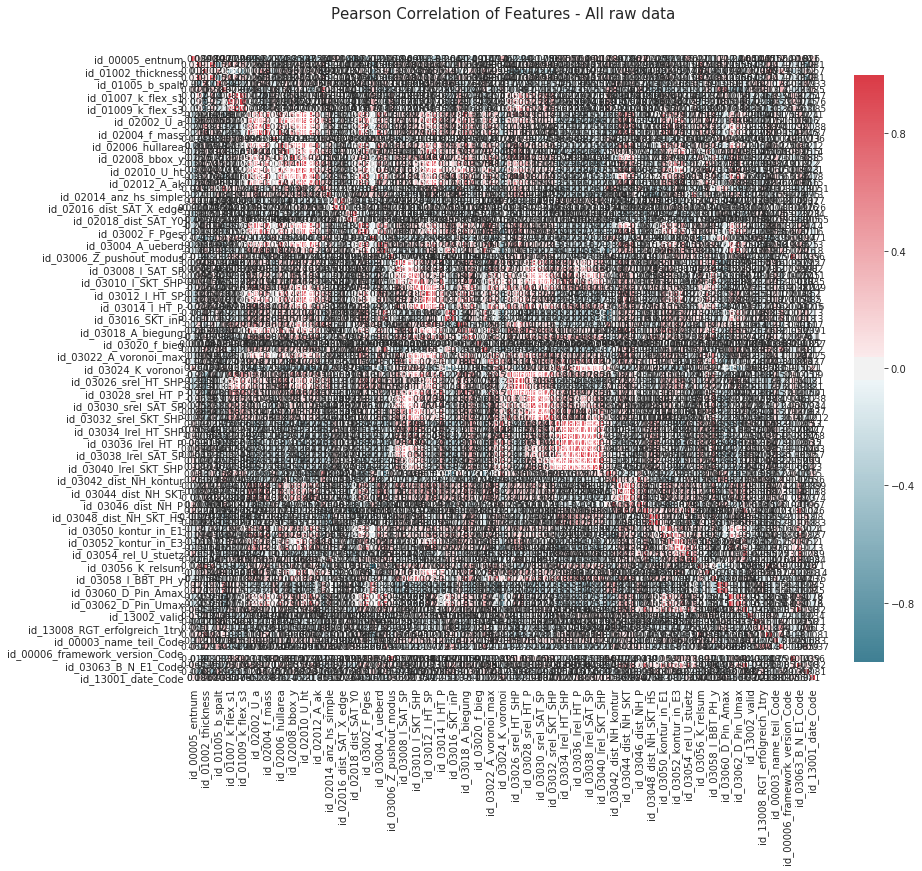

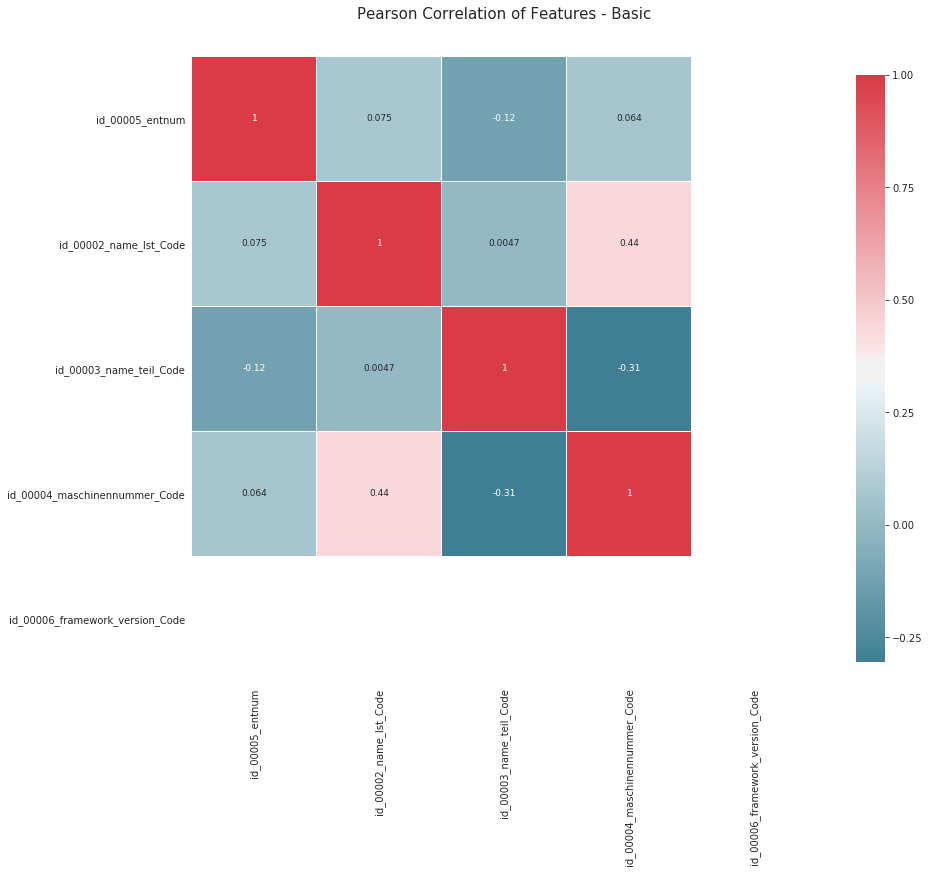

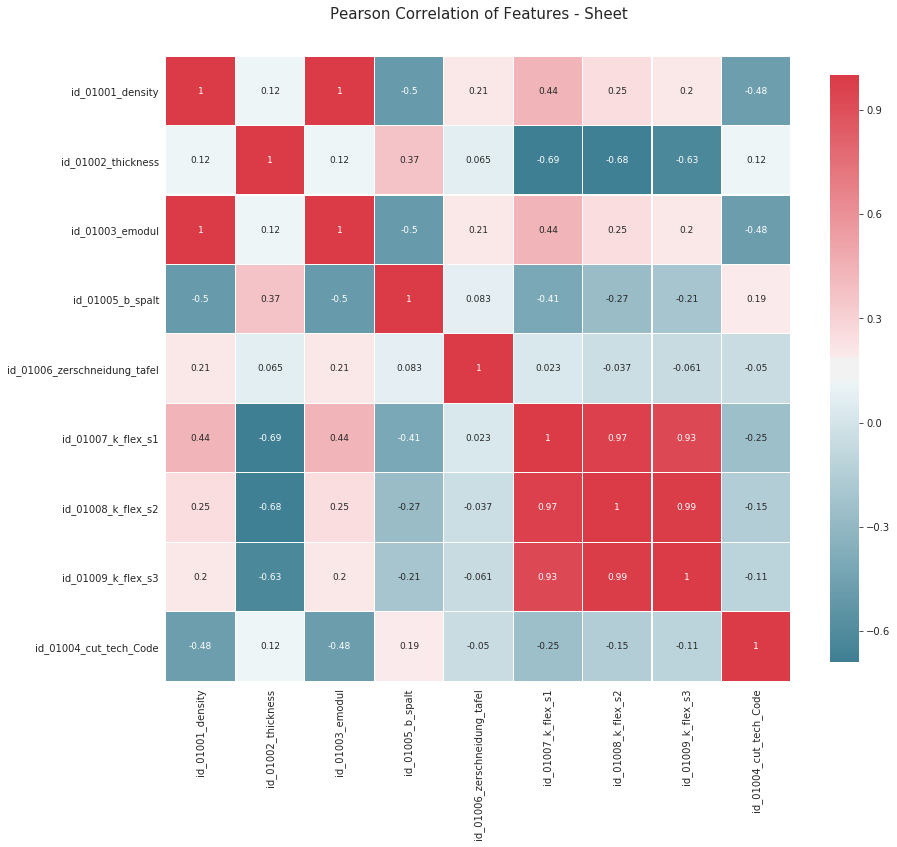

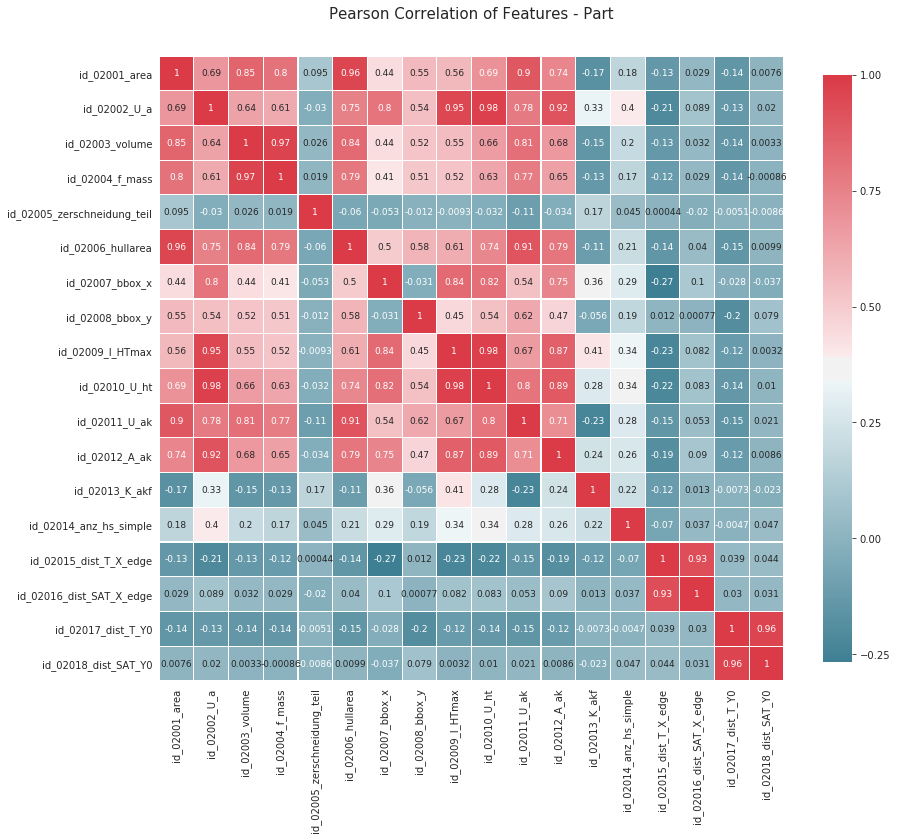

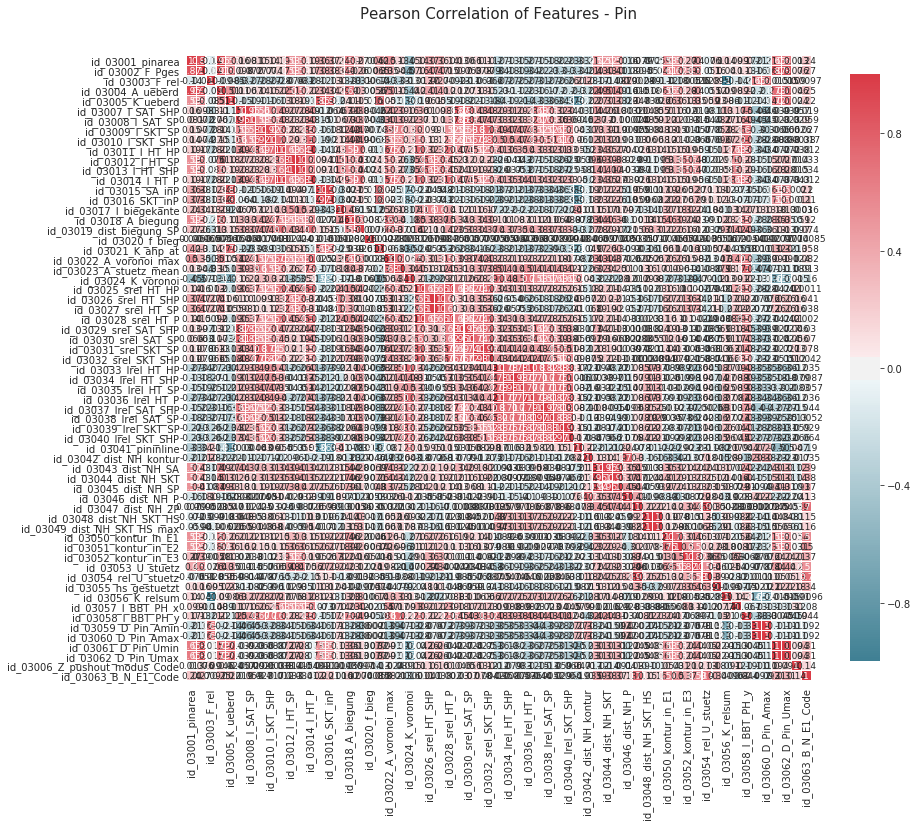

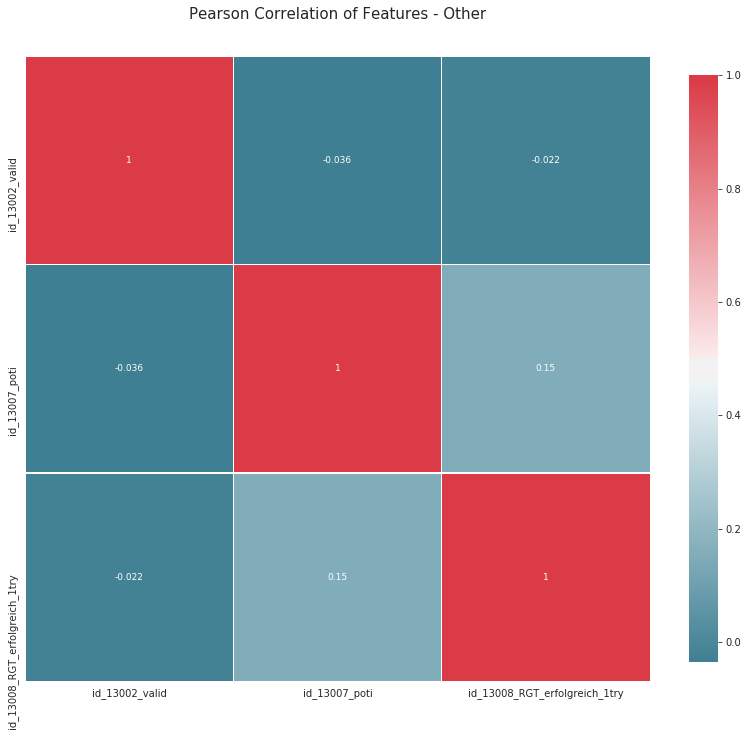

In [17]:
#correlation heatmap of dataset
def correlation_heatmap(df,title='Heatmap'):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':9 }
    )
    
    plt.title('Pearson Correlation of Features - ' + title, y=1.05, size=15)
correlation_heatmap(data1,'All raw data')
correlation_heatmap(basic,'Basic')
correlation_heatmap(sheet,'Sheet')
correlation_heatmap(part,'Part')
correlation_heatmap(pin,'Pin')
correlation_heatmap(oth,'Other')

<a id="ch7"></a>
# Step 5: Model Data


In [15]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    #ensemble.AdaBoostClassifier(),
    #ensemble.BaggingClassifier(),
    #ensemble.ExtraTreesClassifier(),
    #ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes (to much memory)
    #gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    #linear_model.PassiveAggressiveClassifier(),
    #linear_model.RidgeClassifierCV(),
    #linear_model.SGDClassifier(),
    #linear_model.Perceptron(),
    
    #Navies Bayes
    #naive_bayes.BernoulliNB(),
    #naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    #neighbors.KNeighborsClassifier(),
    
   
    
    #Trees    
    tree.DecisionTreeClassifier(),
    #tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    #discriminant_analysis.LinearDiscriminantAnalysis(),
    #discriminant_analysis.QuadraticDiscriminantAnalysis(),

    #SVM
    #svm.SVC(probability=True), 
    #svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()
    

    
    ]


#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data1[Target].copy()



In [16]:
### choose different features
print("size data" + str(data1.shape))

########## MANUAL
import fnmatch
pattern = ['id_01006*','id_01007*','id_02001*','id_02003*','id_02004*','id_02005*','id_02006*','id_03003*',
           'id_03004*','id_03005*','id_03017*','id_03020*','id_03022*','id_03028*','id_03027*' ]
matching = pattern
for i,pp in enumerate(pattern):
    matching[i] = fnmatch.filter(data1.columns.values, pp)[0]
    
#### OUTPUT
USED_FEATURES = matching
feature_str = 'manuel_selection'

###### by cross correlation
#corrTarget = pd.read_csv('corrWithTarget.csv')
#corrTarget = corrTarget.fillna(-1)

#corrTargetValues = corrTarget.iloc[:,-1]
#corrTargetNames = corrTarget.columns.values

#corrTargetNames = corrTargetNames[1:]

#corrTargetValues.hist()
# delete every correlction smaller thres
#thres = 0.0
#corrTargetMask = corrTargetValues > thres

#corrTargetValues = corrTargetValues[corrTargetMask]
#corrTargetNames = corrTargetNames[corrTargetMask]

#### OUTPUT
#USED_FEATURES = matching
#feature_str = 'cross_corr_selection_thres_' + str(thres)

##### sheet part pin
#### OUTPUT
#USED_FEATURES = list(part.columns.values) + list(pin.columns.values)
#USED_FEATURES = list(pin.columns.values)
#feature_str = 'part_pin_oth_pca'



print("num of features used: " + str(len(USED_FEATURES)))

size data(119816, 99)
num of features used: 15


In [17]:
## feature plot

plt.figure(figsize=(30,15))
sns.heatmap(data1[USED_FEATURES].astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.savefig('viz/results_ml_algos/'+feature_str + "_feature_correlation"+'.png', dpi=300, bbox_inches='tight')
plt.close()

In [18]:
#index through MLA and save performance to table
row_index = 0
for i,alg in enumerate(MLA):

    #set name and parameters
    MLA_name = alg.__class__.__name__
    print("Iter : " + str(i) + ' with Algo ' + MLA_name)
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data1[USED_FEATURES], data1[Target], cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    
    #save MLA predictions - see section 6 for usage
    alg.fit(data1[USED_FEATURES], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[USED_FEATURES])


    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)


Iter : 0 with Algo RandomForestClassifier
Iter : 1 with Algo LogisticRegressionCV
Iter : 2 with Algo DecisionTreeClassifier
Iter : 3 with Algo LinearSVC
Iter : 4 with Algo XGBClassifier


MLA Name                                     MLA Parameters  \
0  RandomForestClassifier  {'bootstrap': True, 'class_weight': None, 'cri...   
2  DecisionTreeClassifier  {'class_weight': None, 'criterion': 'gini', 'm...   
4           XGBClassifier  {'base_score': 0.5, 'booster': 'gbtree', 'cols...   
3               LinearSVC  {'C': 1.0, 'class_weight': None, 'dual': True,...   
1    LogisticRegressionCV  {'Cs': 10, 'class_weight': None, 'cv': None, '...   

  MLA Train Accuracy Mean MLA Test Accuracy Mean MLA Test Accuracy 3*STD  \
0                 0.87743               0.849553              0.00659233   
2                 0.87899               0.847264              0.00541975   
4                 0.79629               0.794722              0.00913254   
3                0.538545               0.538812                0.175396   
1                0.431519               0.431301              0.00650903   

   MLA Time  
0   1.14441  
2  0.636764  
4   5.13299  
3   25.4573  
1   7.28476

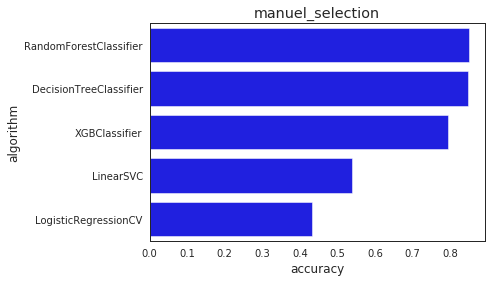

In [19]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'b')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title(feature_str)
plt.xlabel('accuracy')
plt.ylabel('algorithm')
plt.savefig('viz/results_ml_algos/'+feature_str + "_mean_acc"+'.png', dpi=300, bbox_inches='tight')

MLA_compare.to_csv('viz/results_ml_algos/'+feature_str+'.csv')
MLA_compare

<a id="ch8"></a>
## 5.1 Evaluate Model Performance

Reference: [Cross-Validation and Decision Tree Tutorial](http://www.cs.utoronto.ca/~fidler/teaching/2015/slides/CSC411/tutorial3_CrossVal-DTs.pdf)

## 5.11 Model Performance with Cross-Validation (CV)
In step 5.0, we used [sklearn cross_validate](http://scikit-learn.org/stable/modules/cross_validation.html#multimetric-cross-validation) function to train, test, and score our model performance.

Remember, it's important we use a different subset for train data to build our model and test data to evaluate our model. Otherwise, our model will be overfitted. Meaning it's great at "predicting" data it's already seen, but terrible at predicting data it has not seen; which is not prediction at all. It's like cheating on a school quiz to get 100%, but then when you go to take the exam, you fail because you never truly learned anything. The same is true with machine learning.

CV is basically a shortcut to split and score our model multiple times, so we can get an idea of how well it will perform on unseen data. It’s a little more expensive in computer processing, but it's important so we don't gain false confidence. This is helpful in a Kaggle Competition or any use case where consistency matters and surprises should be avoided.
 
In addition to CV, we used a customized [sklearn train test splitter](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection), to allow a little more randomness in our test scoring. Below is an image of the default CV split.

![CV](http://blog-test.goldenhelix.com/wp-content/uploads/2015/04/B-fig-1.jpg)

<a id="ch9"></a>
# 5.12 Tune Model with Hyper-Parameters
When we used [sklearn Decision Tree (DT) Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), we accepted all the function defaults. This leaves opportunity to see how various hyper-parameter settings will change the model accuracy.  [(Click here to learn more about parameters vs hyper-parameters.)](https://www.youtube.com/watch?v=EJtTNboTsm8)

We will tune our model using [ParameterGrid](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterGrid.html#sklearn.model_selection.ParameterGrid), [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV), and customized [sklearn scoring](http://scikit-learn.org/stable/modules/model_evaluation.html); [click here to learn more about ROC_AUC scores](http://www.dataschool.io/roc-curves-and-auc-explained/). We will then visualize our tree with [graphviz](http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz). [Click here to learn more about ROC_AUC scores](http://www.dataschool.io/roc-curves-and-auc-explained/).


In [35]:
#base model
dtree = tree.DecisionTreeClassifier(random_state = 0)
base_results = model_selection.cross_validate(dtree, data1[USED_FEATURES], data1[Target], cv  = cv_split)
dtree.fit(data1[USED_FEATURES], data1[Target])

print('BEFORE DT Parameters: ', dtree.get_params())
print("BEFORE DT Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
#print("BEFORE DT Test w/bin set score min: {:.2f}". format(base_results['test_score'].min()*100))
print('-'*10)


#tune hyper-parameters: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
param_grid = {'criterion': ['gini', 'entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              #'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
              'max_depth': [2,4,6,8,10,None], #max depth tree can grow; default is none
              #'min_samples_split': [2,5,10,.03,.05], #minimum subset size BEFORE new split (fraction is % of total); default is 2
              #'min_samples_leaf': [1,5,10,.03,.05], #minimum subset size AFTER new split split (fraction is % of total); default is 1
              #'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
              'random_state': [0] #seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
             }

#print(list(model_selection.ParameterGrid(param_grid)))

#choose best model with grid_search: #http://scikit-learn.org/stable/modules/grid_search.html#grid-search
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
tune_model = model_selection.GridSearchCV(ensemble.RandomForestClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split)
tune_model.fit(data1[USED_FEATURES], data1[Target])

#print(tune_model.cv_results_.keys())
#print(tune_model.cv_results_['params'])
print('AFTER DT Parameters: ', tune_model.best_params_)
#print(tune_model.cv_results_['mean_train_score'])
print("AFTER DT Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(tune_model.cv_results_['mean_test_score'])
print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)


#duplicates gridsearchcv
#tune_results = model_selection.cross_validate(tune_model, data1[USED_FEATURES], data1[Target], cv  = cv_split)

#print('AFTER DT Parameters: ', tune_model.best_params_)
#print("AFTER DT Training w/bin set score mean: {:.2f}". format(tune_results['train_score'].mean()*100)) 
#print("AFTER DT Test w/bin set score mean: {:.2f}". format(tune_results['test_score'].mean()*100))
#print("AFTER DT Test w/bin set score min: {:.2f}". format(tune_results['test_score'].min()*100))
#print('-'*10)


BEFORE DT Parameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 0, 'splitter': 'best'}
BEFORE DT Training w/bin score mean: 100.00
BEFORE DT Test w/bin score mean: 100.00
BEFORE DT Test w/bin score 3*std: +/- 0.00
----------


KeyboardInterrupt: 

<a id="ch10"></a>
## 5.13 Tune Model with Feature Selection
As stated in the beginning, more predictor variables do not make a better model, but the right predictors do. So another step in data modeling is feature selection. [Sklearn](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has several options, we will use [recursive feature elimination (RFE) with cross validation (CV)](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV).

In [34]:
#base model
print('BEFORE DT RFE Training Shape Old: ', data1[USED_FEATURES].shape) 
print('BEFORE DT RFE Training Columns Old: ', data1[USED_FEATURES].columns.values)

print("BEFORE DT RFE Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT RFE Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT RFE Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
print('-'*10)



#feature selection
dtree_rfe = feature_selection.RFECV(dtree, step = 1, scoring = 'accuracy', cv = cv_split)
dtree_rfe.fit(data1[USED_FEATURES], data1[Target])

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
X_rfe = data1[USED_FEATURES].columns.values[dtree_rfe.get_support()]
rfe_results = model_selection.cross_validate(dtree, data1[X_rfe], data1[Target], cv  = cv_split)

#print(dtree_rfe.grid_scores_)
print('AFTER DT RFE Training Shape New: ', data1[X_rfe].shape) 
print('AFTER DT RFE Training Columns New: ', X_rfe)

print("AFTER DT RFE Training w/bin score mean: {:.2f}". format(rfe_results['train_score'].mean()*100)) 
print("AFTER DT RFE Test w/bin score mean: {:.2f}". format(rfe_results['test_score'].mean()*100))
print("AFTER DT RFE Test w/bin score 3*std: +/- {:.2f}". format(rfe_results['test_score'].std()*100*3))
print('-'*10)


#tune rfe model
rfe_tune_model = model_selection.GridSearchCV(ensemble.RandomForestClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split)
rfe_tune_model.fit(data1[X_rfe], data1[Target])

#print(rfe_tune_model.cv_results_.keys())
#print(rfe_tune_model.cv_results_['params'])
print('AFTER DT RFE Tuned Parameters: ', rfe_tune_model.best_params_)
#print(rfe_tune_model.cv_results_['mean_train_score'])
print("AFTER DT RFE Tuned Training w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(rfe_tune_model.cv_results_['mean_test_score'])
print("AFTER DT RFE Tuned Test w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT RFE Tuned Test w/bin score 3*std: +/- {:.2f}". format(rfe_tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)

BEFORE DT RFE Training Shape Old:  (119816, 84)
BEFORE DT RFE Training Columns Old:  ['id_02001_area' 'id_02002_U_a' 'id_02003_volume' 'id_02004_f_mass'
 'id_02005_zerschneidung_teil' 'id_02006_hullarea' 'id_02007_bbox_x'
 'id_02008_bbox_y' 'id_02009_l_HTmax' 'id_02010_U_ht' 'id_02011_U_ak'
 'id_02012_A_ak' 'id_02013_K_akf' 'id_02014_anz_hs_simple'
 'id_02015_dist_T_X_edge' 'id_02016_dist_SAT_X_edge' 'id_02017_dist_T_Y0'
 'id_02018_dist_SAT_Y0' 'id_03001_pinarea' 'id_03002_F_Pges'
 'id_03003_F_rel' 'id_03004_A_ueberd' 'id_03005_K_ueberd'
 'id_03007_l_SAT_SHP' 'id_03008_l_SAT_SP' 'id_03009_l_SKT_SP'
 'id_03010_l_SKT_SHP' 'id_03011_l_HT_HP' 'id_03012_l_HT_SP'
 'id_03013_l_HT_SHP' 'id_03014_l_HT_P' 'id_03015_SA_inP'
 'id_03016_SKT_inP' 'id_03017_l_biegekante' 'id_03018_A_biegung'
 'id_03019_dist_biegung_SP' 'id_03020_f_bieg' 'id_03021_K_ahp_at'
 'id_03022_A_voronoi_max' 'id_03023_A_stuetz_mean' 'id_03024_K_voronoi'
 'id_03025_srel_HT_HP' 'id_03026_srel_HT_SHP' 'id_03027_srel_HT_SP'
 'id_0

NameError: name 'base_results' is not defined

In [30]:
#Graph MLA version of Decision Tree: http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
import graphviz 
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names = data1_x_bin, class_names = True,
                                filled = True, rounded = True)
graph = graphviz.Source(dot_data) 
graph

ExecutableNotFound: ignored

<a id="ch11"></a>
# Step 6: Validate and Implement
The next step is to prepare for submission using the validation data. 

In [0]:
#compare algorithm predictions with each other, where 1 = exactly similar and 0 = exactly opposite
#there are some 1's, but enough blues and light reds to create a "super algorithm" by combining them
correlation_heatmap(MLA_predict)

In [0]:
#why choose one model, when you can pick them all with voting classifier
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
#removed models w/o attribute 'predict_proba' required for vote classifier and models with a 1.0 correlation to another model
vote_est = [
    #Ensemble Methods: http://scikit-learn.org/stable/modules/ensemble.html
    ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc',ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),

    #Gaussian Processes: http://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-classification-gpc
    ('gpc', gaussian_process.GaussianProcessClassifier()),
    
    #GLM: http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    ('lr', linear_model.LogisticRegressionCV()),
    
    #Navies Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html
    ('bnb', naive_bayes.BernoulliNB()),
    ('gnb', naive_bayes.GaussianNB()),
    
    #Nearest Neighbor: http://scikit-learn.org/stable/modules/neighbors.html
    ('knn', neighbors.KNeighborsClassifier()),
    
    #SVM: http://scikit-learn.org/stable/modules/svm.html
    ('svc', svm.SVC(probability=True)),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
   ('xgb', XGBClassifier())

]


#Hard Vote or majority rules
vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, data1[data1_x_bin], data1[Target], cv  = cv_split)
vote_hard.fit(data1[data1_x_bin], data1[Target])

print("Hard Voting Training w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))
print('-'*10)


#Soft Vote or weighted probabilities
vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, data1[data1_x_bin], data1[Target], cv  = cv_split)
vote_soft.fit(data1[data1_x_bin], data1[Target])

print("Soft Voting Training w/bin score mean: {:.2f}". format(vote_soft_cv['train_score'].mean()*100)) 
print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)


In [0]:
#IMPORTANT: THIS SECTION IS UNDER CONSTRUCTION!!!! 12.24.17
#UPDATE: This section was scrapped for the next section; as it's more computational friendly.

#WARNING: Running is very computational intensive and time expensive
#code is written for experimental/developmental purposes and not production ready


#tune each estimator before creating a super model
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_n_estimator = [50,100,300]
grid_ratio = [.1,.25,.5,.75,1.0]
grid_learn = [.01,.03,.05,.1,.25]
grid_max_depth = [2,4,6,None]
grid_min_samples = [5,10,.03,.05,.10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]

vote_param = [{
#            #http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
            'ada__n_estimators': grid_n_estimator,
            'ada__learning_rate': grid_ratio,
            'ada__algorithm': ['SAMME', 'SAMME.R'],
            'ada__random_state': grid_seed,
    
            #http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier
            'bc__n_estimators': grid_n_estimator,
            'bc__max_samples': grid_ratio,
            'bc__oob_score': grid_bool, 
            'bc__random_state': grid_seed,
            
            #http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier
            'etc__n_estimators': grid_n_estimator,
            'etc__criterion': grid_criterion,
            'etc__max_depth': grid_max_depth,
            'etc__random_state': grid_seed,


            #http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier
            'gbc__loss': ['deviance', 'exponential'],
            'gbc__learning_rate': grid_ratio,
            'gbc__n_estimators': grid_n_estimator,
            'gbc__criterion': ['friedman_mse', 'mse', 'mae'],
            'gbc__max_depth': grid_max_depth,
            'gbc__min_samples_split': grid_min_samples,
            'gbc__min_samples_leaf': grid_min_samples,      
            'gbc__random_state': grid_seed,
    
            #http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
            'rfc__n_estimators': grid_n_estimator,
            'rfc__criterion': grid_criterion,
            'rfc__max_depth': grid_max_depth,
            'rfc__min_samples_split': grid_min_samples,
            'rfc__min_samples_leaf': grid_min_samples,   
            'rfc__bootstrap': grid_bool,
            'rfc__oob_score': grid_bool, 
            'rfc__random_state': grid_seed,
        
            #http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV
            'lr__fit_intercept': grid_bool,
            'lr__penalty': ['l1','l2'],
            'lr__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'lr__random_state': grid_seed,
            
            #http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB
            'bnb__alpha': grid_ratio,
            'bnb__prior': grid_bool,
            'bnb__random_state': grid_seed,
    
            #http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
            'knn__n_neighbors': [1,2,3,4,5,6,7],
            'knn__weights': ['uniform', 'distance'],
            'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'knn__random_state': grid_seed,
            
            #http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
            #http://blog.hackerearth.com/simple-tutorial-svm-parameter-tuning-python-r
            'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'svc__C': grid_max_depth,
            'svc__gamma': grid_ratio,
            'svc__decision_function_shape': ['ovo', 'ovr'],
            'svc__probability': [True],
            'svc__random_state': grid_seed,
    
    
            #http://xgboost.readthedocs.io/en/latest/parameter.html
            'xgb__learning_rate': grid_ratio,
            'xgb__max_depth': [2,4,6,8,10],
            'xgb__tree_method': ['exact', 'approx', 'hist'],
            'xgb__objective': ['reg:linear', 'reg:logistic', 'binary:logistic'],
            'xgb__seed': grid_seed    

        }]




#Soft Vote with tuned models
#grid_soft = model_selection.GridSearchCV(estimator = vote_soft, param_grid = vote_param, cv = 2, scoring = 'roc_auc')
#grid_soft.fit(data1[data1_x_bin], data1[Target])

#print(grid_soft.cv_results_.keys())
#print(grid_soft.cv_results_['params'])
#print('Soft Vote Tuned Parameters: ', grid_soft.best_params_)
#print(grid_soft.cv_results_['mean_train_score'])
#print("Soft Vote Tuned Training w/bin set score mean: {:.2f}". format(grid_soft.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(grid_soft.cv_results_['mean_test_score'])
#print("Soft Vote Tuned Test w/bin set score mean: {:.2f}". format(grid_soft.cv_results_['mean_test_score'][tune_model.best_index_]*100))
#print("Soft Vote Tuned Test w/bin score 3*std: +/- {:.2f}". format(grid_soft.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
#print('-'*10)


#credit: https://rasbt.github.io/mlxtend/user_guide/classifier/EnsembleVoteClassifier/
#cv_keys = ('mean_test_score', 'std_test_score', 'params')
#for r, _ in enumerate(grid_soft.cv_results_['mean_test_score']):
#    print("%0.3f +/- %0.2f %r"
#          % (grid_soft.cv_results_[cv_keys[0]][r],
#             grid_soft.cv_results_[cv_keys[1]][r] / 2.0,
#             grid_soft.cv_results_[cv_keys[2]][r]))


#print('-'*10)


In [0]:
#WARNING: Running is very computational intensive and time expensive.
#Code is written for experimental/developmental purposes and not production ready!


#Hyperparameter Tune with GridSearchCV: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]


grid_param = [
            [{
            #AdaBoostClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
            'n_estimators': grid_n_estimator, #default=50
            'learning_rate': grid_learn, #default=1
            #'algorithm': ['SAMME', 'SAMME.R'], #default=’SAMME.R
            'random_state': grid_seed
            }],
       
    
            [{
            #BaggingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier
            'n_estimators': grid_n_estimator, #default=10
            'max_samples': grid_ratio, #default=1.0
            'random_state': grid_seed
             }],

    
            [{
            #ExtraTreesClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'random_state': grid_seed
             }],


            [{
            #GradientBoostingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier
            #'loss': ['deviance', 'exponential'], #default=’deviance’
            'learning_rate': [.05], #default=0.1 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            'n_estimators': [300], #default=100 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            #'criterion': ['friedman_mse', 'mse', 'mae'], #default=”friedman_mse”
            'max_depth': grid_max_depth, #default=3   
            'random_state': grid_seed
             }],

    
            [{
            #RandomForestClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'oob_score': [True], #default=False -- 12/31/17 set to reduce runtime -- The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 146.35 seconds.
            'random_state': grid_seed
             }],
    
            [{    
            #GaussianProcessClassifier
            'max_iter_predict': grid_n_estimator, #default: 100
            'random_state': grid_seed
            }],
        
    
            [{
            #LogisticRegressionCV - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV
            'fit_intercept': grid_bool, #default: True
            #'penalty': ['l1','l2'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
            'random_state': grid_seed
             }],
            
    
            [{
            #BernoulliNB - http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB
            'alpha': grid_ratio, #default: 1.0
             }],
    
    
            #GaussianNB - 
            [{}],
    
            [{
            #KNeighborsClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
            'n_neighbors': [1,2,3,4,5,6,7], #default: 5
            'weights': ['uniform', 'distance'], #default = ‘uniform’
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }],
            
    
            [{
            #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
            #http://blog.hackerearth.com/simple-tutorial-svm-parameter-tuning-python-r
            #'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [1,2,3,4,5], #default=1.0
            'gamma': grid_ratio, #edfault: auto
            'decision_function_shape': ['ovo', 'ovr'], #default:ovr
            'probability': [True],
            'random_state': grid_seed
             }],

    
            [{
            #XGBClassifier - http://xgboost.readthedocs.io/en/latest/parameter.html
            'learning_rate': grid_learn, #default: .3
            'max_depth': [1,2,4,6,8,10], #default 2
            'n_estimators': grid_n_estimator, 
            'seed': grid_seed  
             }]   
        ]



start_total = time.perf_counter() #https://docs.python.org/3/library/time.html#time.perf_counter
for clf, param in zip (vote_est, grid_param): #https://docs.python.org/3/library/functions.html#zip

    #print(clf[1]) #vote_est is a list of tuples, index 0 is the name and index 1 is the algorithm
    #print(param)
    
    
    start = time.perf_counter()        
    best_search = model_selection.GridSearchCV(estimator = clf[1], param_grid = param, cv = cv_split, scoring = 'roc_auc')
    best_search.fit(data1[data1_x_bin], data1[Target])
    run = time.perf_counter() - start

    best_param = best_search.best_params_
    print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(clf[1].__class__.__name__, best_param, run))
    clf[1].set_params(**best_param) 


run_total = time.perf_counter() - start_total
print('Total optimization time was {:.2f} minutes.'.format(run_total/60))

print('-'*10)

In [0]:
#Hard Vote or majority rules w/Tuned Hyperparameters
grid_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
grid_hard_cv = model_selection.cross_validate(grid_hard, data1[data1_x_bin], data1[Target], cv  = cv_split)
grid_hard.fit(data1[data1_x_bin], data1[Target])

print("Hard Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_hard_cv['train_score'].mean()*100)) 
print("Hard Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))
print("Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_hard_cv['test_score'].std()*100*3))
print('-'*10)

#Soft Vote or weighted probabilities w/Tuned Hyperparameters
grid_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
grid_soft_cv = model_selection.cross_validate(grid_soft, data1[data1_x_bin], data1[Target], cv  = cv_split)
grid_soft.fit(data1[data1_x_bin], data1[Target])

print("Soft Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_soft_cv['train_score'].mean()*100)) 
print("Soft Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))
print("Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_soft_cv['test_score'].std()*100*3))
print('-'*10)


#12/31/17 tuned with data1_x_bin
#The best parameter for AdaBoostClassifier is {'learning_rate': 0.1, 'n_estimators': 300, 'random_state': 0} with a runtime of 33.39 seconds.
#The best parameter for BaggingClassifier is {'max_samples': 0.25, 'n_estimators': 300, 'random_state': 0} with a runtime of 30.28 seconds.
#The best parameter for ExtraTreesClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'random_state': 0} with a runtime of 64.76 seconds.
#The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 34.35 seconds.
#The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 76.32 seconds.
#The best parameter for GaussianProcessClassifier is {'max_iter_predict': 10, 'random_state': 0} with a runtime of 6.01 seconds.
#The best parameter for LogisticRegressionCV is {'fit_intercept': True, 'random_state': 0, 'solver': 'liblinear'} with a runtime of 8.04 seconds.
#The best parameter for BernoulliNB is {'alpha': 0.1} with a runtime of 0.19 seconds.
#The best parameter for GaussianNB is {} with a runtime of 0.04 seconds.
#The best parameter for KNeighborsClassifier is {'algorithm': 'brute', 'n_neighbors': 7, 'weights': 'uniform'} with a runtime of 4.84 seconds.
#The best parameter for SVC is {'C': 2, 'decision_function_shape': 'ovo', 'gamma': 0.1, 'probability': True, 'random_state': 0} with a runtime of 29.39 seconds.
#The best parameter for XGBClassifier is {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300, 'seed': 0} with a runtime of 46.23 seconds.
#Total optimization time was 5.56 minutes.

In [0]:
#prepare data for modeling
print(data_val.info())
print("-"*10)
#data_val.sample(10)



#handmade decision tree - submission score = 0.77990
data_val['Survived'] = mytree(data_val).astype(int)


#decision tree w/full dataset modeling submission score: defaults= 0.76555, tuned= 0.77990
#submit_dt = tree.DecisionTreeClassifier()
#submit_dt = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split)
#submit_dt.fit(data1[data1_x_bin], data1[Target])
#print('Best Parameters: ', submit_dt.best_params_) #Best Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
#data_val['Survived'] = submit_dt.predict(data_val[data1_x_bin])


#bagging w/full dataset modeling submission score: defaults= 0.75119, tuned= 0.77990
#submit_bc = ensemble.BaggingClassifier()
#submit_bc = model_selection.GridSearchCV(ensemble.BaggingClassifier(), param_grid= {'n_estimators':grid_n_estimator, 'max_samples': grid_ratio, 'oob_score': grid_bool, 'random_state': grid_seed}, scoring = 'roc_auc', cv = cv_split)
#submit_bc.fit(data1[data1_x_bin], data1[Target])
#print('Best Parameters: ', submit_bc.best_params_) #Best Parameters:  {'max_samples': 0.25, 'n_estimators': 500, 'oob_score': True, 'random_state': 0}
#data_val['Survived'] = submit_bc.predict(data_val[data1_x_bin])


#extra tree w/full dataset modeling submission score: defaults= 0.76555, tuned= 0.77990
#submit_etc = ensemble.ExtraTreesClassifier()
#submit_etc = model_selection.GridSearchCV(ensemble.ExtraTreesClassifier(), param_grid={'n_estimators': grid_n_estimator, 'criterion': grid_criterion, 'max_depth': grid_max_depth, 'random_state': grid_seed}, scoring = 'roc_auc', cv = cv_split)
#submit_etc.fit(data1[data1_x_bin], data1[Target])
#print('Best Parameters: ', submit_etc.best_params_) #Best Parameters:  {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'random_state': 0}
#data_val['Survived'] = submit_etc.predict(data_val[data1_x_bin])


#random foreset w/full dataset modeling submission score: defaults= 0.71291, tuned= 0.73205
#submit_rfc = ensemble.RandomForestClassifier()
#submit_rfc = model_selection.GridSearchCV(ensemble.RandomForestClassifier(), param_grid={'n_estimators': grid_n_estimator, 'criterion': grid_criterion, 'max_depth': grid_max_depth, 'random_state': grid_seed}, scoring = 'roc_auc', cv = cv_split)
#submit_rfc.fit(data1[data1_x_bin], data1[Target])
#print('Best Parameters: ', submit_rfc.best_params_) #Best Parameters:  {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'random_state': 0}
#data_val['Survived'] = submit_rfc.predict(data_val[data1_x_bin])



#ada boosting w/full dataset modeling submission score: defaults= 0.74162, tuned= 0.75119
#submit_abc = ensemble.AdaBoostClassifier()
#submit_abc = model_selection.GridSearchCV(ensemble.AdaBoostClassifier(), param_grid={'n_estimators': grid_n_estimator, 'learning_rate': grid_ratio, 'algorithm': ['SAMME', 'SAMME.R'], 'random_state': grid_seed}, scoring = 'roc_auc', cv = cv_split)
#submit_abc.fit(data1[data1_x_bin], data1[Target])
#print('Best Parameters: ', submit_abc.best_params_) #Best Parameters:  {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 300, 'random_state': 0}
#data_val['Survived'] = submit_abc.predict(data_val[data1_x_bin])


#gradient boosting w/full dataset modeling submission score: defaults= 0.75119, tuned= 0.77033
#submit_gbc = ensemble.GradientBoostingClassifier()
#submit_gbc = model_selection.GridSearchCV(ensemble.GradientBoostingClassifier(), param_grid={'learning_rate': grid_ratio, 'n_estimators': grid_n_estimator, 'max_depth': grid_max_depth, 'random_state':grid_seed}, scoring = 'roc_auc', cv = cv_split)
#submit_gbc.fit(data1[data1_x_bin], data1[Target])
#print('Best Parameters: ', submit_gbc.best_params_) #Best Parameters:  {'learning_rate': 0.25, 'max_depth': 2, 'n_estimators': 50, 'random_state': 0}
#data_val['Survived'] = submit_gbc.predict(data_val[data1_x_bin])

#extreme boosting w/full dataset modeling submission score: defaults= 0.73684, tuned= 0.77990
#submit_xgb = XGBClassifier()
#submit_xgb = model_selection.GridSearchCV(XGBClassifier(), param_grid= {'learning_rate': grid_learn, 'max_depth': [0,2,4,6,8,10], 'n_estimators': grid_n_estimator, 'seed': grid_seed}, scoring = 'roc_auc', cv = cv_split)
#submit_xgb.fit(data1[data1_x_bin], data1[Target])
#print('Best Parameters: ', submit_xgb.best_params_) #Best Parameters:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300, 'seed': 0}
#data_val['Survived'] = submit_xgb.predict(data_val[data1_x_bin])


#hard voting classifier w/full dataset modeling submission score: defaults= 0.75598, tuned = 0.77990
#data_val['Survived'] = vote_hard.predict(data_val[data1_x_bin])
data_val['Survived'] = grid_hard.predict(data_val[data1_x_bin])


#soft voting classifier w/full dataset modeling submission score: defaults= 0.73684, tuned = 0.74162
#data_val['Survived'] = vote_soft.predict(data_val[data1_x_bin])
#data_val['Survived'] = grid_soft.predict(data_val[data1_x_bin])


#submit file
submit = data_val[['PassengerId','Survived']]
submit.to_csv("../working/submit.csv", index=False)

print('Validation Data Distribution: \n', data_val['Survived'].value_counts(normalize = True))
submit.sample(10)



<a id="ch12"></a>
# Step 7: Optimize and Strategize
## Conclusion
Iteration one of the Data Science Framework, seems to converge on 0.77990 submission accuracy. Using the same dataset and different implementation of a decision tree (adaboost, random forest, gradient boost, xgboost, etc.) with tuning does not exceed the 0.77990 submission accuracy. Interesting for this dataset, the simple decision tree algorithm had the best default submission score and with tuning achieved the same best accuracy score.

While no general conclusions can be made from testing a handful of algorithms on a single dataset, there are several observations on the mentioned dataset. 
1. The train dataset has a different distribution than the test/validation dataset and population. This created wide margins between the cross validation (CV) accuracy score and Kaggle submission accuracy score.
2. Given the same dataset, decision tree based algorithms, seemed to converge on the same accuracy score after proper tuning.
3. Despite tuning, no machine learning algorithm, exceeded the homemade algorithm. The author will theorize, that for small datasets, a manmade algorithm is the bar to beat. 

With that in mind, for iteration two, I would spend more time on preprocessing and feature engineering. In order to better align the CV score and Kaggle score and improve the overall accuracy.



<a id="ch90"></a>
## Change Log:
11/22/17 Please note, this kernel is currently in progress, but open to feedback. Thanks!  
11/23/17 Cleaned up published notebook and updated through step 3.  
11/25/17 Added enhancements to published notebook and started step 4.  
11/26/17 Skipped ahead to data model, since this is a published notebook. Accuracy with (very) simple data cleaning and logistic regression is **~82%**. Continue to up vote and I will continue to develop this notebook. Thanks!  
12/2/17 Updated section 4 with exploratory analysis and section 5 with more classifiers. Improved model to **~85%** accuracy.  
12/3/17 Update section 4 with improved graphical statistics.  
12/7/17 Updated section 5 with Data Science 101 Lesson.  
12/8/17 Reorganized section 3 & 4 with cleaner code.  
12/9/17 Updated section 5 with model optimization how-tos. Initial competition submission with Decision Tree; will update with better algorithm later.  
12/10/17 Updated section 3 & 4 with cleaner code and better datasets.  
12/11/17 Updated section 5 with better how-tos.  
12/12/17 Cleaned section 5 to prep for hyper-parameter tuning.  
12/13/17 Updated section 5 to focus on learning data modeling via decision tree.  
12/20/17 Updated section 4 - Thanks @Daniel M. for suggestion to split up visualization code. Started working on section 6 for "super" model.  
12/23/17 Edited section 1-5 for clarity and more concise code.  
12/24/17 Updated section 5 with random_state and score for more consistent results.  
12/31/17 Completed data science framework iteration 1 and added section 7 with conclusion.  

<a id="ch91"></a>
# Credits
Programming is all about "borrowing" code, because knife sharpens knife. Nonetheless, I want to give credit, where credit is due. 

* [Introduction to Machine Learning with Python: A Guide for Data Scientists by Andreas Müller and Sarah Guido](https://www.amazon.com/gp/product/1449369413/ref=as_li_tl?ie=UTF8&tag=kaggle-20&camp=1789&creative=9325&linkCode=as2&creativeASIN=1449369413&linkId=740510c3199892cca1632fe738fb8d08) - Machine Learning 101 written by a core developer of sklearn
* [Visualize This: The Flowing Data Guide to Design, Visualization, and Statistics by Nathan Yau](https://www.amazon.com/gp/product/0470944889/ref=as_li_tl?ie=UTF8&tag=kaggle-20&camp=1789&creative=9325&linkCode=as2&creativeASIN=0470944889&linkId=f797da48813ed5cfc762ce5df8ef957f) - Learn the art and science of data visualization
* [Machine Learning for Dummies by John Mueller and Luca Massaron ](https://www.amazon.com/gp/product/1119245516/ref=as_li_tl?ie=UTF8&tag=kaggle-20&camp=1789&creative=9325&linkCode=as2&creativeASIN=1119245516&linkId=5b4ac9a6fd1da198d82f9ca841d1af9f) - Easy to understand for a beginner book, but detailed to actually learn the fundamentals of the topic
